## ROLLING xG
<br> Rolling xG helps is a graph of cumulative xG of a team v/s the time of the match. It helps us analyze when the momentum shifted (if it did) and who created better chances over the course of the game. the rolling xG graphs in this notebook are not a fair indicator of the match as they only consider the open play shots disregarding possible high xG events such as penalties.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_context('poster')

In [28]:
matches_World_Cup=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\matches_World_Cup.json')

In [29]:
events_World_Cup=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\events_World_Cup.json')

In [30]:
allshots=pd.read_csv('allshots.csv')

In [31]:
data=events_World_Cup[['id','matchId']]
data_=events_World_Cup[['id','teamId']]
data=data.set_index('id')
data_=data_.set_index('id')

In [32]:
team_dict=data_.to_dict()


In [33]:
worldcup_dict=data.to_dict()
worldcup_dict=worldcup_dict['matchId']
team_dict=team_dict['teamId']

In [34]:
worldcup_shots=allshots.loc[allshots['competition']==4]

In [35]:
matchId=[]
teamId=[]
for i in range(worldcup_shots.shape[0]):
    matchId=np.append(matchId, worldcup_dict[worldcup_shots.iloc[i]['id']])
    teamId=np.append(teamId, team_dict[worldcup_shots.iloc[i]['id']])

In [36]:
worldcup_shots['matchId']=matchId
worldcup_shots['teamId']=teamId

In [37]:
worldcup_shots['matchId']=worldcup_shots['matchId'].astype(int)
worldcup_shots['teamId']=worldcup_shots['teamId'].astype(int)

In [38]:
worldcup_shots.to_csv('worldcup_shots.csv',index=False)

## Rolling xG Graph for France vs Uruguay (2-0)

In [39]:
worldcup_match = worldcup_shots.loc[worldcup_shots['matchId']==2058010]

In [40]:
france_shots=worldcup_match[worldcup_match['teamId']==4418]

The team Id of france is 4418

In [41]:
uruguay_shots=worldcup_match[worldcup_match['teamId']==15670]

The team Id of Uruguay is 15670

In [42]:
uruguay_shots

,playerId,id,x_coordinates,y_coordinates,blocked,goal,time,matchPeriod,counter,competition,foot,bodypart,preferrence,angles,distance,headers,xG,matchId,teamId
33707,20460,262102716,50.40,60.52,0.0,0.0,30.0,0,0.0,4,1.0,1.0,1.0,6.21,60.70,0.0,0.0218,2058010,15670
33708,116349,262102786,91.35,43.52,0.0,0.0,35.0,0,0.0,4,1.0,1.0,1.0,20.76,16.64,0.0,0.0741,2058010,15670
33710,299618,262102888,76.65,23.80,0.0,0.0,42.0,0,0.0,4,1.0,2.0,0.0,13.06,30.13,0.0,0.0157,2058010,15670
33711,20460,262102916,94.50,34.00,0.0,0.0,43.0,0,0.0,4,1.0,3.0,1.0,38.43,10.50,1.0,0.0815,2058010,15670
33712,3433,262102919,102.90,29.24,0.0,0.0,43.0,0,0.0,4,1.0,2.0,0.0,48.35,5.20,0.0,0.5661,2058010,15670
33714,361807,262103243,86.10,48.96,0.0,0.0,55.0,1,0.0,4,1.0,2.0,0.0,13.70,24.10,0.0,0.0250,2058010,15670
33715,20460,262103289,91.35,51.00,0.0,0.0,58.0,1,0.0,4,1.0,1.0,1.0,12.21,21.80,0.0,0.0349,2058010,15670
33717,70095,262103355,81.90,27.88,1.0,0.0,63.0,1,0.0,4,0.0,2.0,1.0,16.87,23.90,0.0,0.0661,2058010,15670
33718,70095,262103356,86.10,29.92,0.0,0.0,63.0,1,0.0,4,0.0,2.0,1.0,21.00,19.34,0.0,0.0653,2058010,15670


In [43]:
def getrollingxGdata(shots_data):
    cum_xG=[]
    temp = 0
    for i in range(shots_data.shape[0]):
        temp= temp + shots_data.iloc[i]['xG']
        cum_xG=np.append(cum_xG, temp)
    cum_xG=np.insert(cum_xG, 0 , 0)
    cum_xG=np.append(cum_xG,cum_xG[len(cum_xG)-1])
    time = shots_data.time
    time=np.array(time)
    time=np.insert(time,0,0)
    time = np.append(time,90)
    return cum_xG, time

In [44]:
france_cumxG, france_time = getrollingxGdata(france_shots)
uruguay_cumxG, uruguay_time = getrollingxGdata(uruguay_shots)

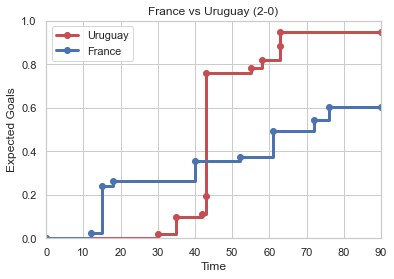

In [45]:
sns.set(style='whitegrid')
plt.plot(uruguay_time,uruguay_cumxG, drawstyle='steps-post', color='r', linewidth=3, label='Uruguay', marker='o')
plt.plot(france_time,france_cumxG, drawstyle='steps-post', color='b',linewidth=3, label='France', marker='o')
plt.xlim(0,90)
plt.ylim(0,1)
plt.ylabel('Expected Goals')
plt.xlabel('Time')
plt.title('France vs Uruguay (2-0)')
plt.legend(loc='upper left')

**Uruguay end up having a better xG and still lose the match by two goals. This happened because the conceded a long range effort from Griezmann due to a goalkeeper howler.** 

## Rolling xG for France vs Croatia (4-2) World Cup Final

In [46]:
worldcup_final=worldcup_shots.loc[worldcup_shots['matchId']==2058017]

In [47]:
worldcup_final_france = worldcup_final.loc[worldcup_final['teamId']==4418]
worldcup_final_croatia = worldcup_final.loc[worldcup_final['teamId']==9598]

In [48]:
france_final_xG, france_final_time = getrollingxGdata(worldcup_final_france)

In [49]:
croatia_final_xG, croatia_final_time = getrollingxGdata(worldcup_final_croatia)

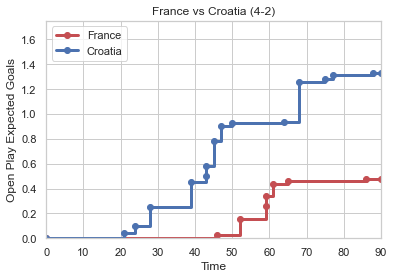

In [50]:
sns.set(style='whitegrid')
plt.plot(france_final_time,france_final_xG, drawstyle='steps-post', color='r', linewidth=3, label='France', marker='o')
plt.plot(croatia_final_time,croatia_final_xG, drawstyle='steps-post', color='b',linewidth=3, label='Croatia', marker='o')
plt.xlim(0,90)
plt.ylim(0,1.75)
plt.ylabel('Open Play Expected Goals')
plt.xlabel('Time')
plt.title('France vs Croatia (4-2)')
plt.legend(loc='upper left')

The above graph is not a very good indicator as it does not account for a penalty won and scored by France. 